In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/extrovert-vs-introvert-behavior-data/personality_datasert.csv
/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import tensorflow 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



2025-06-25 20:54:01.722314: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750884842.017609      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750884842.098959      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
df = pd.read_csv("/kaggle/input/extrovert-vs-introvert-behavior-data/personality_datasert.csv")
df.shape

(2900, 8)

In [4]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [5]:
print(df.isnull().values.any())  # Returns True if any NaN


False


In [6]:
def about_data(df):
    # print(df.missing().sum())
    print(df.isnull().sum())
    print("-"*100)

    print(df.duplicated().sum())
    print("-"*100)
    
    print(df.info())
    print("-"*50)

    print(df.describe())
    print("-"*100)

    print(df.describe(include = 'object'))

In [7]:
about_data(df)

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64
----------------------------------------------------------------------------------------------------
402
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        290

In [8]:
# remove duplicated rows
df.drop_duplicates(inplace = True)
# refine categorical and numerical columns 
cate_col = df.select_dtypes(include ='object').columns
num_col = df.select_dtypes(include = ['int64','float64']).columns

# EDA

In [9]:
df['Personality'].value_counts()

Personality
Extrovert    1403
Introvert    1095
Name: count, dtype: int64

In [10]:
def display_chat(df):
    # refine categorical 
    # cate_col = df.select_dtypes(include ='object').columns
    for col in num_col:
        df[col].value_counts().plot(kind = 'bar')
        plt.ylabel("count")
        plt.xlabel(col)
        plt.title(f"bar chart of {col}")
        plt.show()
        df[col].value_counts().plot(kind = 'pie',autopct = '%.2f%%')
        plt.title(f"pie chart of {col}")
        plt.show()

def display_numerical_data(df):
    # num_col = df.select_dtypes(include = ['int64','float64']).columns

    cols = 2
    rows = (len(num_col) + cols - 1) // cols  # Automatically calculates required rows

    # Set the figure size
    plt.figure(figsize=(7 * cols, 4 * rows))
    # distribution of each columns btw their frequency 
    for i,col in enumerate(num_col):
        plt.subplot(rows, cols, i + 1)

        sns.histplot(data = df,x=col,bins =11)
        plt.xlabel(col)
        plt.ylabel("frequency")
        plt.title(f"distribution chart of {col}")
        plt.tight_layout()

        
    plt.suptitle("Histograms of All Numerical Columns", fontsize=18, y=1.02)

    plt.show()



def plot_pdf(df):
    cols = 2
    rows = (len(num_col) + cols - 1) // cols 
    plt.figure(figsize=(7 * cols, 4 * rows))

    for i,col in enumerate(num_col):
        plt.subplot(rows, cols, i + 1)

        sns.distplot(df[col])
        plt.tight_layout()

    plt.suptitle("PDF of All Numerical Columns", fontsize=18, y=1.02)
    plt.show()



def boxplot(df):
    cols = 2
    rows = (len(num_col) + cols - 1) // cols 
    plt.figure(figsize=(7 * cols, 4 * rows))
    for i,col in enumerate(num_col):
        plt.subplot(rows, cols, i + 1)
        sns.boxplot(df[col])
        plt.xlabel(col)
        # plt.tight_layout()


    plt.suptitle("outlier or noisy data ", fontsize=18, y=1.02)
    plt.show()
        
    
        

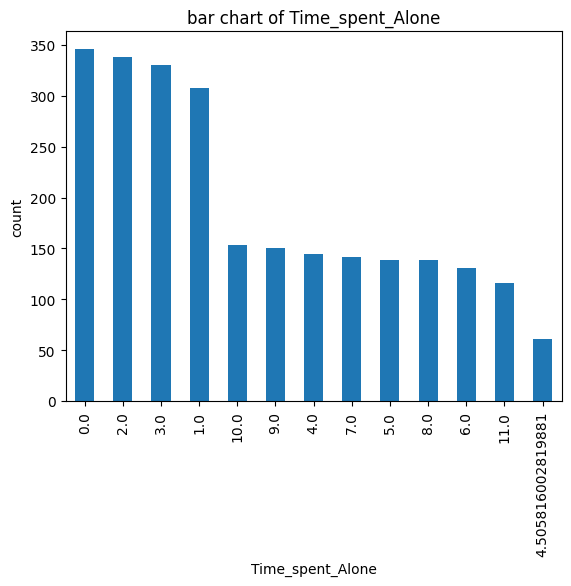

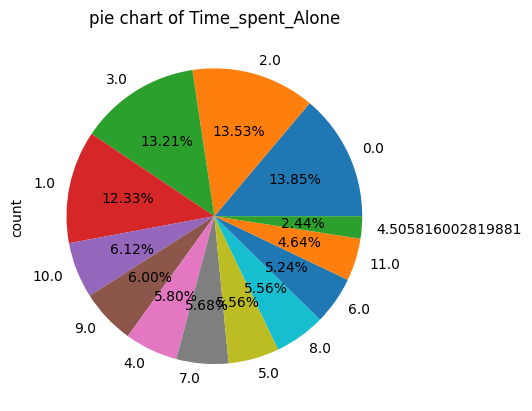

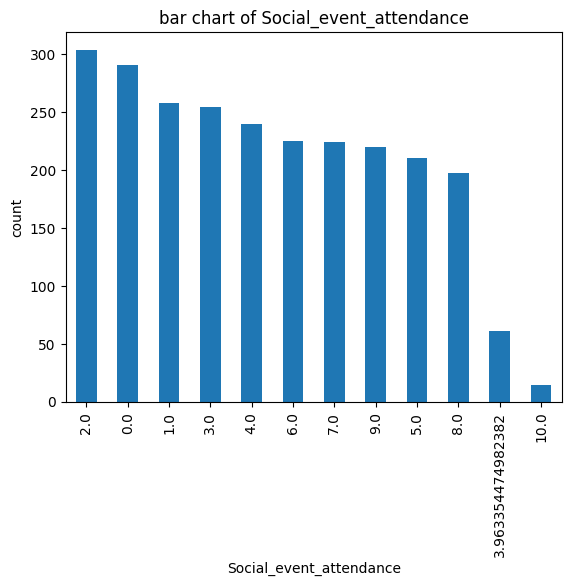

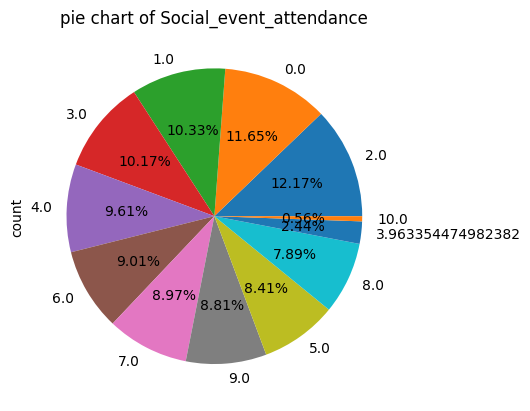

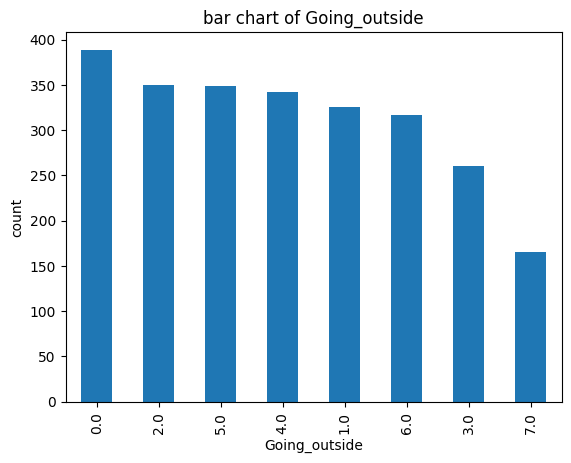

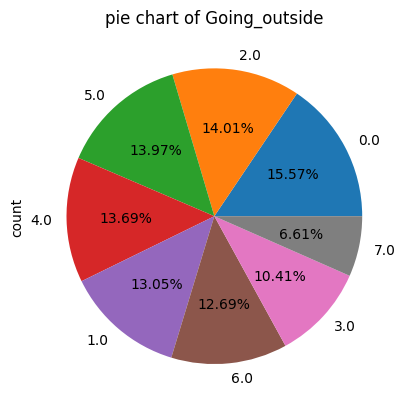

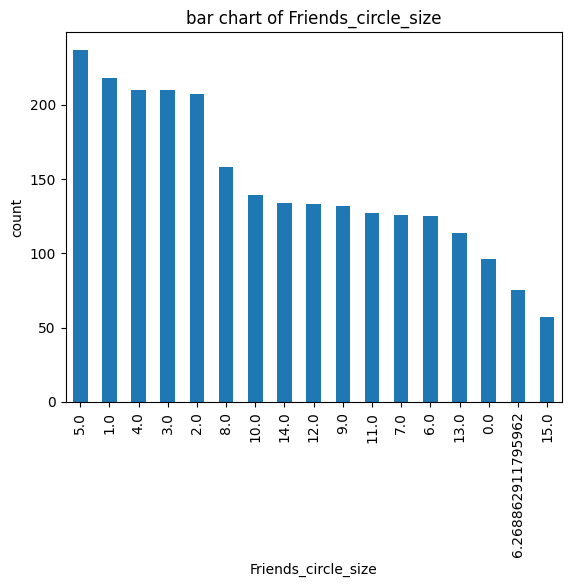

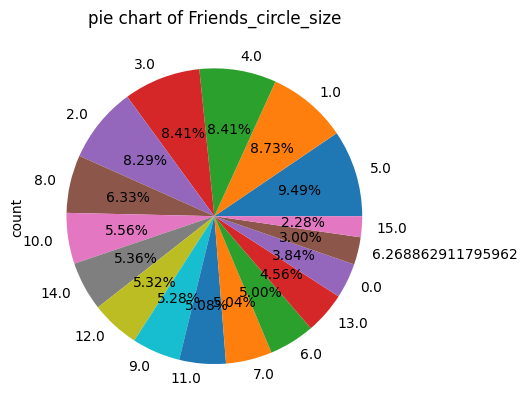

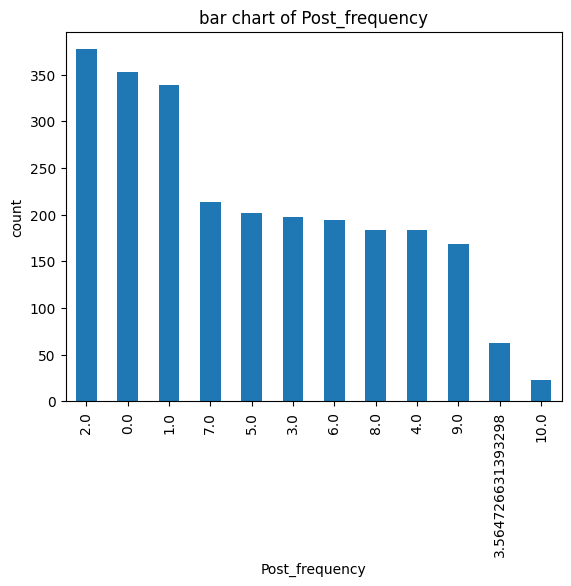

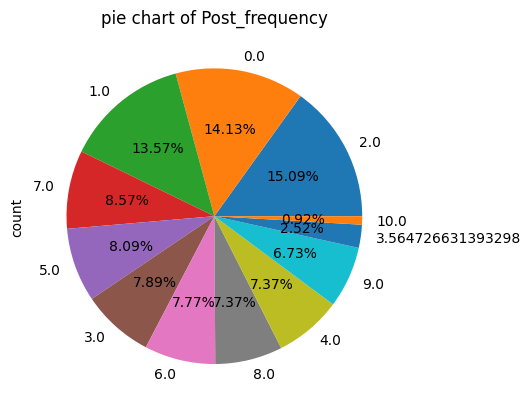

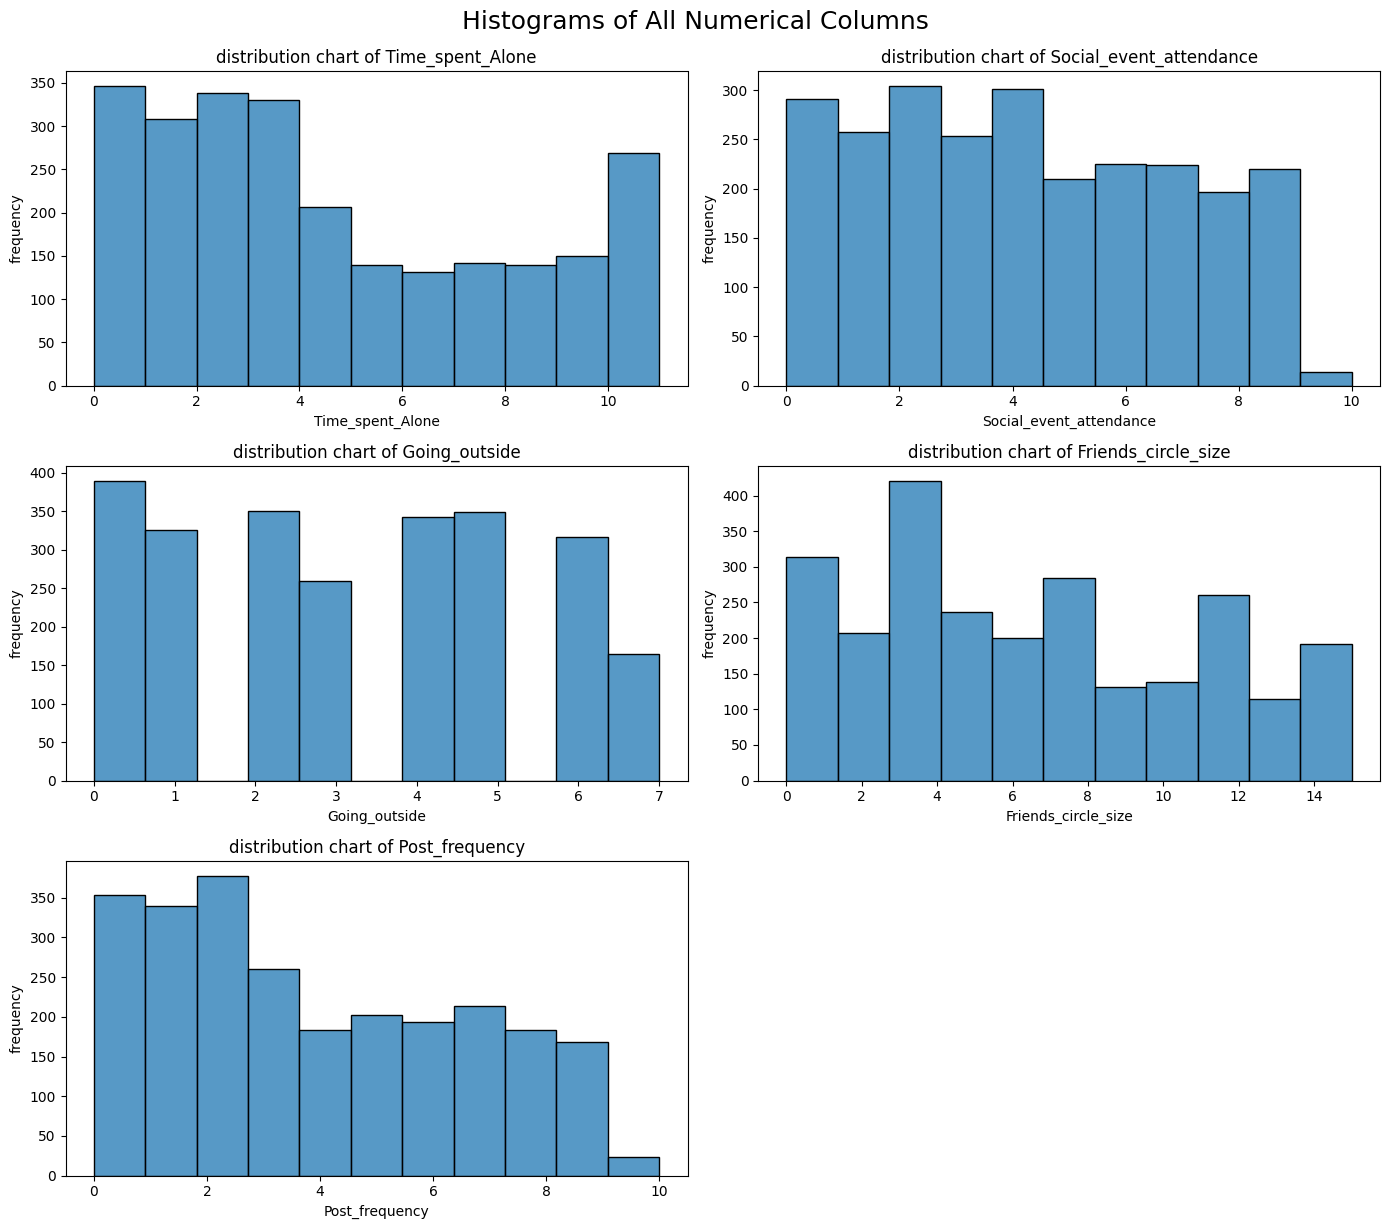

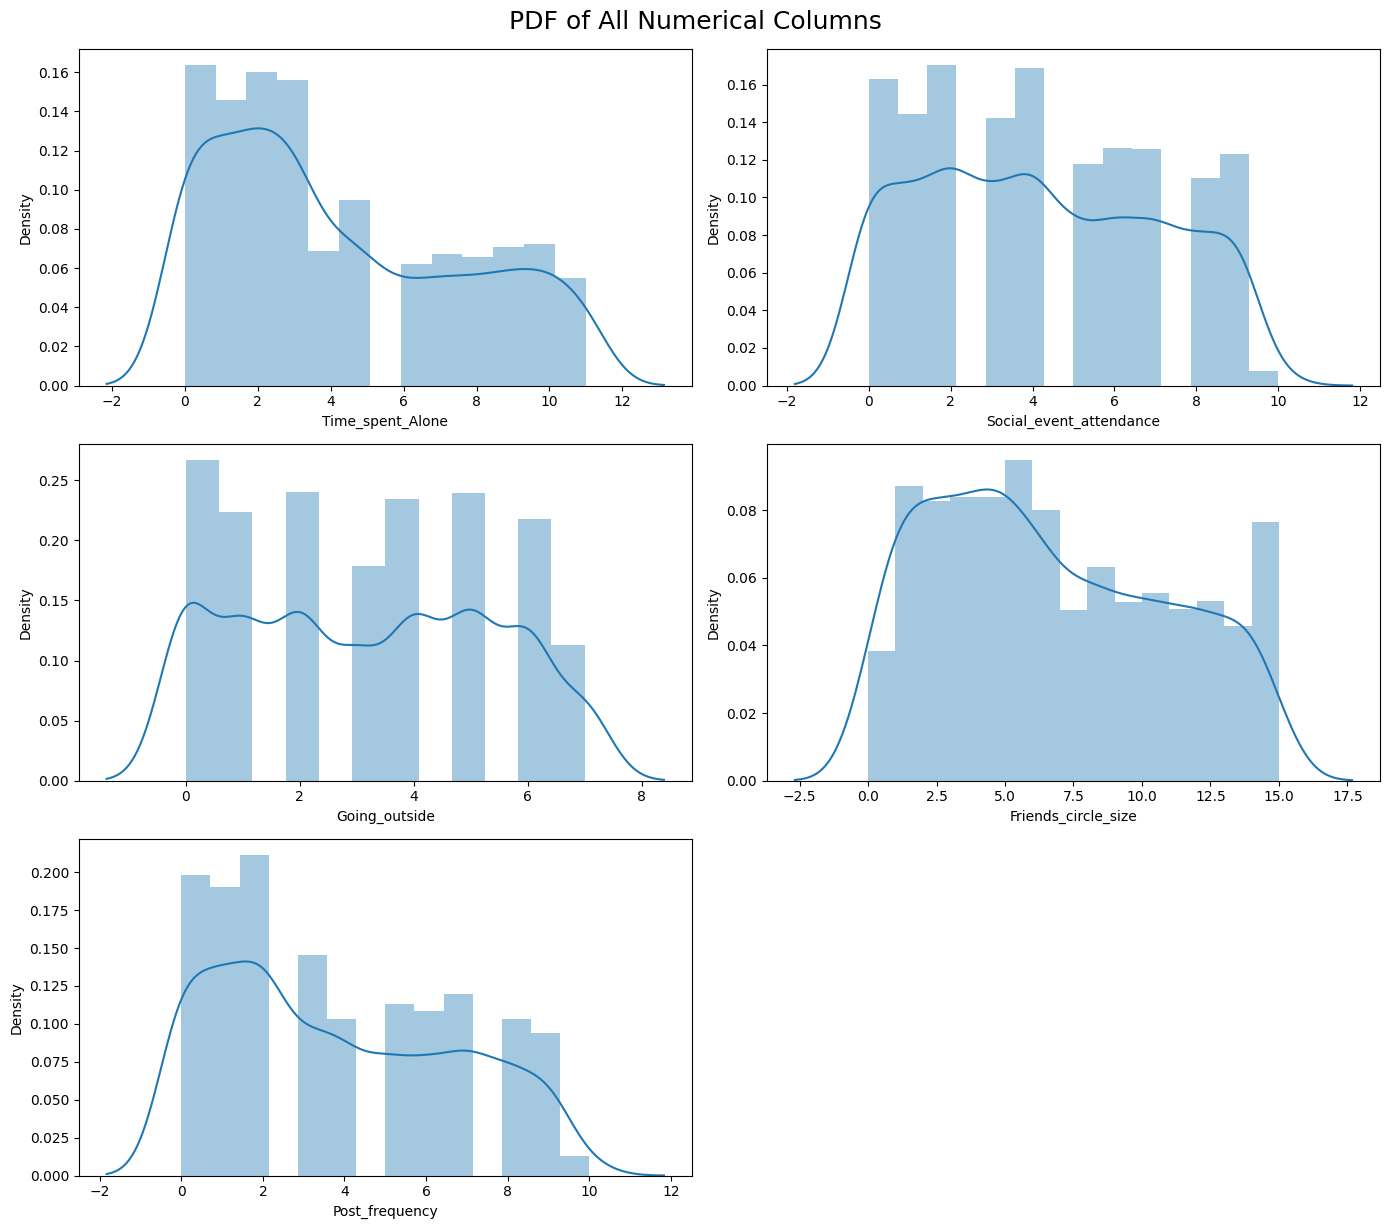

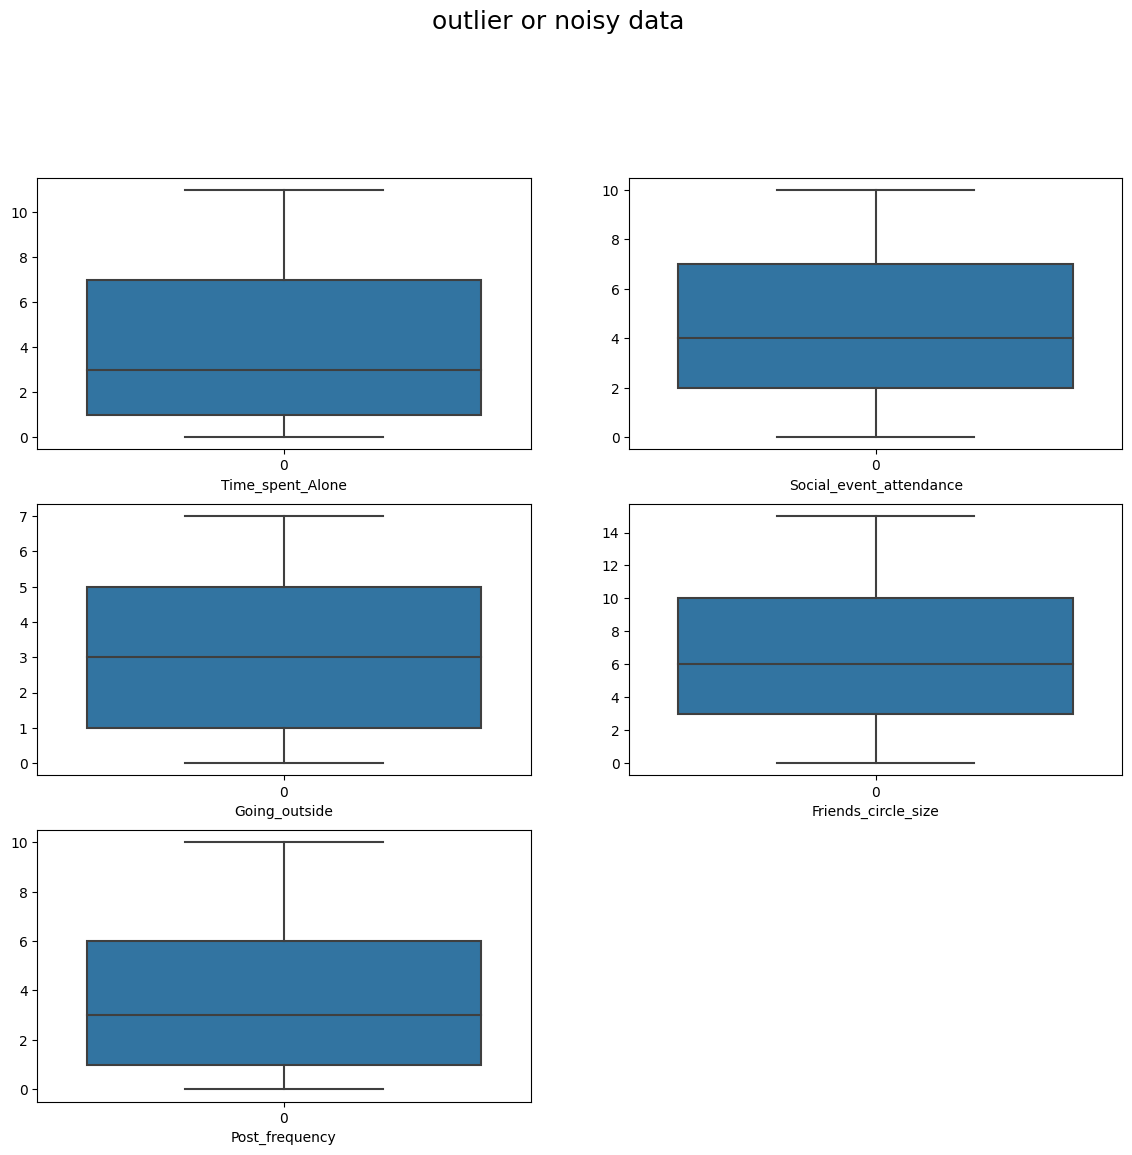

In [11]:
display_chat(df)
display_numerical_data(df)
plot_pdf(df)


boxplot(df)

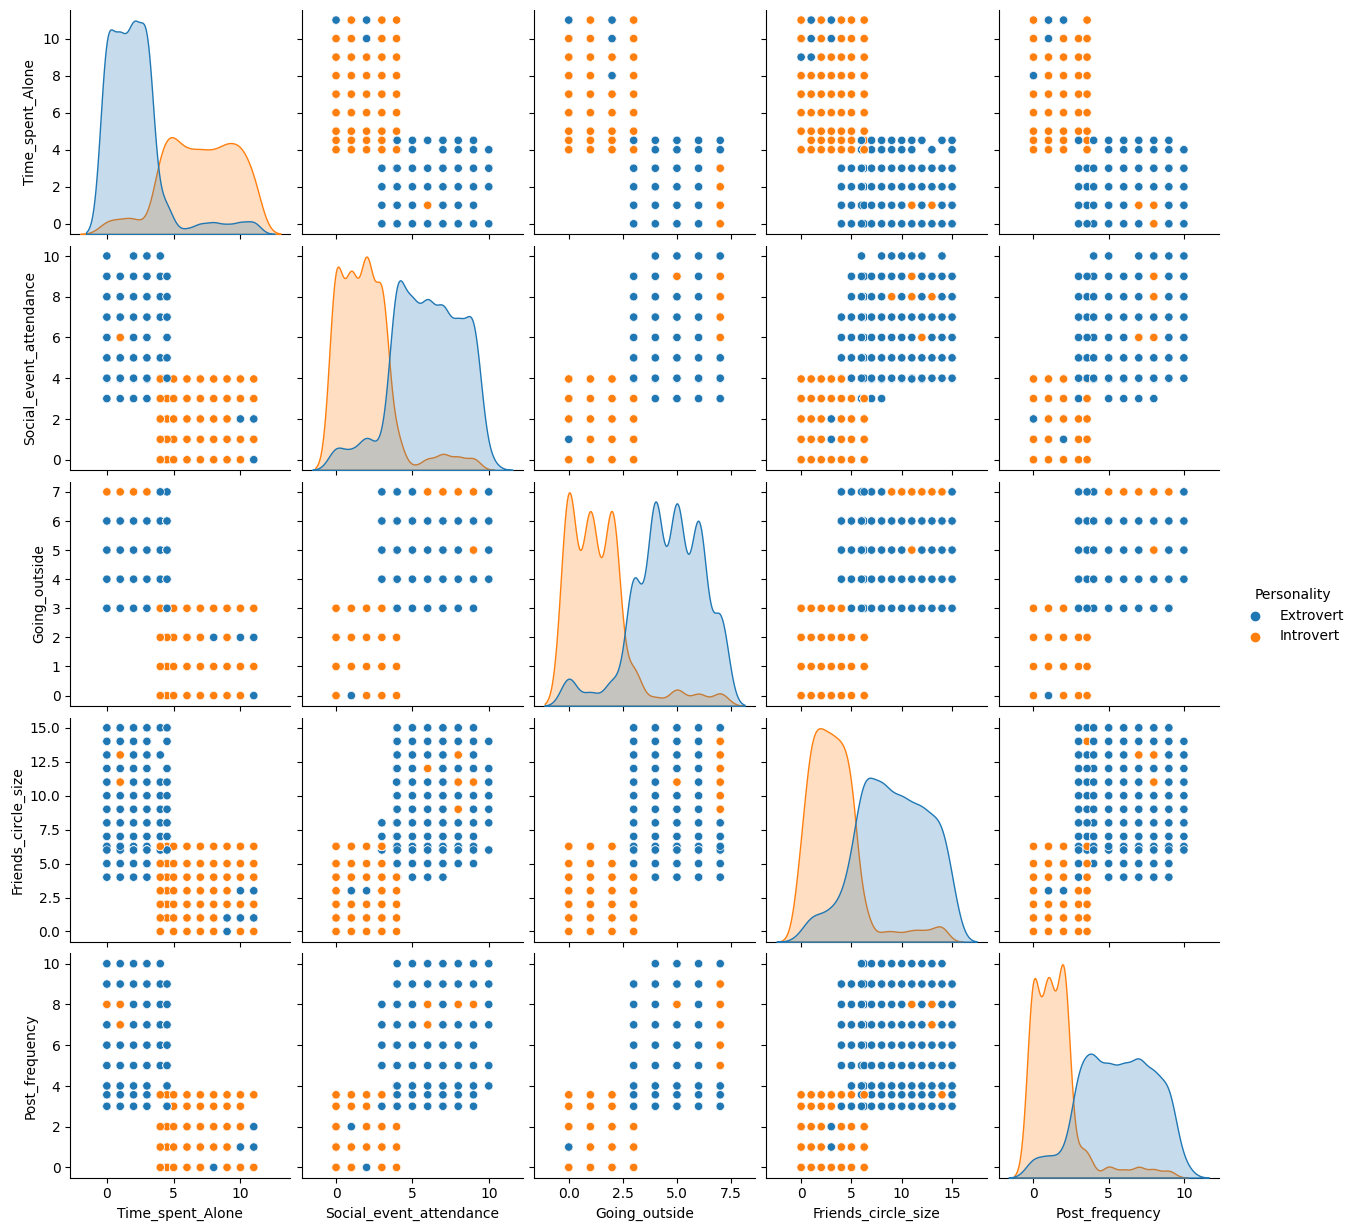

In [12]:

sns.pairplot(df, hue="Personality")
plt.show()

In [13]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.000000,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.000000,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.000000,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.000000,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.000000,Extrovert
...,...,...,...,...,...,...,...,...
2894,0.0,No,9.0,3.0,No,12.0,3.564727,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.000000,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.000000,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.000000,Introvert


# Feature Engineering

In [14]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label = LabelEncoder()
df['Personality']=label.fit_transform(df['Personality'])
ohe = OneHotEncoder(drop = 'first',sparse=False,dtype = np.int32)
encoder = ohe.fit_transform(df[['Stage_fear','Drained_after_socializing']])
encoded_df = pd.DataFrame(encoder,columns =ohe.get_feature_names_out(['Stage_fear','Drained_after_socializing']) )
# encoded_df
df = pd.concat([df.drop(['Stage_fear','Drained_after_socializing'],axis =1).reset_index(drop=True),encoded_df],axis =1)
df.head()


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_Yes,Drained_after_socializing_Yes
0,4.0,4.0,6.0,13.0,5.0,0,0,0
1,9.0,0.0,0.0,0.0,3.0,1,1,1
2,9.0,1.0,2.0,5.0,2.0,1,1,1
3,0.0,6.0,7.0,14.0,8.0,0,0,0
4,3.0,9.0,4.0,8.0,5.0,0,0,0


In [15]:
df.isnull().sum()

Time_spent_Alone                 0
Social_event_attendance          0
Going_outside                    0
Friends_circle_size              0
Post_frequency                   0
Personality                      0
Stage_fear_Yes                   0
Drained_after_socializing_Yes    0
dtype: int64

In [16]:
# df['']

In [17]:
df.shape

(2498, 8)

In [18]:
x = df.drop(columns=['Personality'])
y = df['Personality']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state =43)
x_train.shape

(1998, 7)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [20]:
y

0       0
1       1
2       1
3       0
4       0
       ..
2493    0
2494    0
2495    1
2496    1
2497    0
Name: Personality, Length: 2498, dtype: int64

In [21]:
model  = Sequential()
model.add(Dense(3,activation='relu',input_dim=7))
# model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


2025-06-25 20:54:34.330550: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28 (112.00 B)

 Trainable params: 28 (112.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
# adam = Adam(learning_rate = 0.01)
model.compile(loss ="binary_crossentropy",optimizer = 'adam',metrics = ['accuracy'] )

In [24]:
history = model.fit(x_train_scaler,y_train,epochs = 200,validation_split = 0.2)

Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4473 - loss: 0.7596 - val_accuracy: 0.5300 - val_loss: 0.6610
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5176 - loss: 0.6653 - val_accuracy: 0.6300 - val_loss: 0.6015
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6606 - loss: 0.5885 - val_accuracy: 0.7325 - val_loss: 0.5629
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7548 - loss: 0.5593 - val_accuracy: 0.8050 - val_loss: 0.5359
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8041 - loss: 0.5558 - val_accuracy: 0.8450 - val_loss: 0.5161
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8534 - loss: 0.5235 - val_accuracy: 0.8825 - val_loss: 0.5007
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8927 - loss: 0.4997 - val_accuracy: 0.9000 - val_loss: 0.4884
Epoch 8/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9061 - loss: 0.4895 - val_accuracy: 0.9200 - v

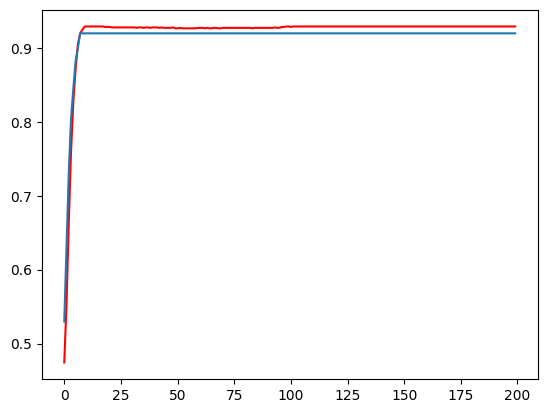

In [25]:
plt.plot(history.history['accuracy'],color = 'red')
plt.plot(history.history['val_accuracy'])

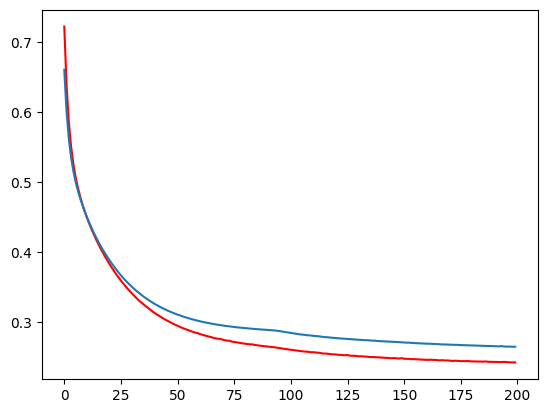

In [26]:
plt.plot(history.history['loss'],color = 'red')
plt.plot(history.history['val_loss'])


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion Matrix:
 [[248  16]
 [ 22 214]]


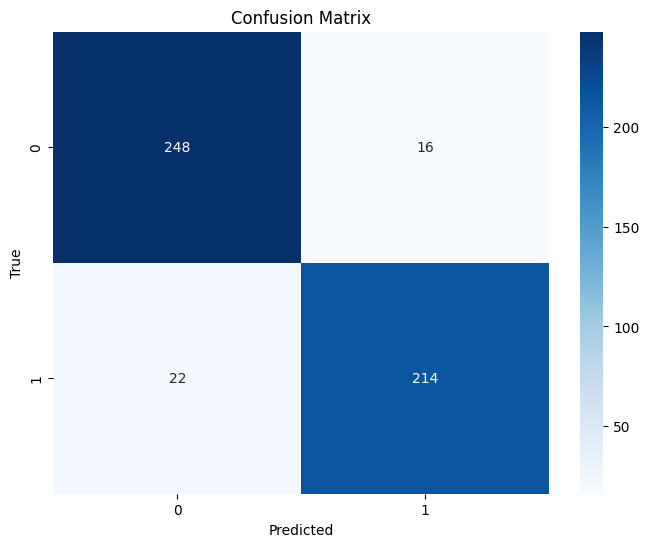

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       264
           1       0.93      0.91      0.92       236

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500

0.924


In [27]:
# Predict probabilities on test set
y_pred_probs = model.predict(x_test_scaler)

# Convert predicted probabilities to class indices
# y_pred = np.argmax(y_pred_probs, axis=1)
y_pred = model.predict(x_test_scaler)
y_pred = (y_pred > 0.5).astype(int)

# Use true labels directly (already encoded)
y_true = y_test

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred))
print(accuracy_score(y_test,y_pred))